# 预测双十一销售额

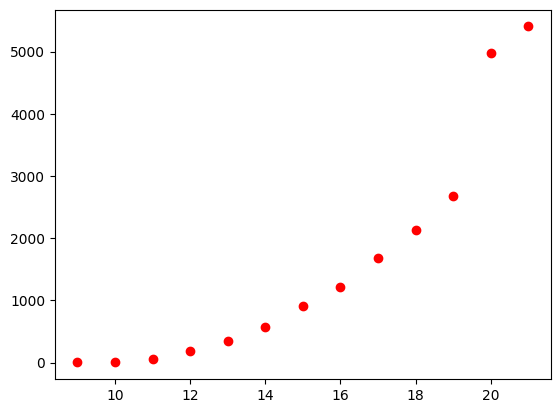

In [6]:
import numpy as np
import matplotlib.pyplot as plt
				#年份 销售额
data = np.array([[9,0.5], 
                 [10,9.36], 
                 [11,52], 
                 [12,191], 
                 [13,350.19], 
                 [14,571], 
                 [15,912.17], 
                 [16,1207], 
                 [17,1682], 
                 [18,2135],
                 [19,2684],
                 [20,4982],
                 [21,5403],
                ])
plt.scatter(data[:,0],data[:,1],c="red")

In [2]:
from sympy import *
m1,m2,m3,b = symbols('m_1,m_2,m_3,b')
init_printing(pretty_print=True)

x_i,real_i,i = symbols("x_i,real_i,i")
expr = Sum((m1*x_i**3 + m2*x_i**2 + m3*x_i + b - real_i)**2,(i,2009,2021))

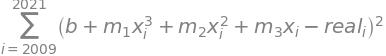

In [3]:
expr

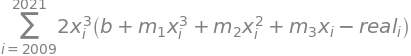

In [4]:
diff(expr,m1)

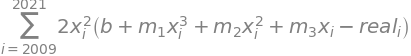

In [5]:
diff(expr,m2)

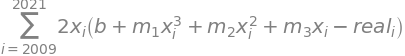

In [6]:
diff(expr,m3)

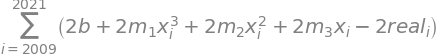

In [7]:
diff(expr,b)

In [9]:
# 实现梯度下降的函数
# 初始化参数
m1,m2,m3,b = 1,1,1,1
# 初始化学习速率
learing_rate = 0.0000000001
def gradient_decent():
    # 声明是全局变量
    global m1,m2,m3,b
    mse = 0
    m1_slop = 0
    m2_slop = 0
    m3_slop = 0
    b_slop = 0
    # 计算上面这些值
    for x,real in data:
        # mse公式
        mse += (m1*x**3 + m2*x**2 + m3*x + b - real)**2
        # mse/m1偏导数
        m1_slop += 2*x**3 * (b + m1*x**3 + m2*x**2 + m3*x - real)
        # mse/m2偏导数
        m2_slop += 2*x**2 * (b + m1*x**3 + m2*x**2 + m3*x - real)
        # mse/m3偏导数
        m3_slop += 2*x**1 * (b + m1*x**3 + m2*x**2 + m3*x - real)
        # mse/b偏导数
        b_slop += 2 * (b + m1*x**3 + m2*x**2 + m3*x - real)

    # 更新m1,m2,m3
    m1 = m1 - m1_slop * learing_rate
    m2 = m2 - m2_slop * learing_rate
    m3 = m3 - m1_slop * learing_rate
    b = b - b_slop * learing_rate
    return m1,m2,m3,b,mse

In [10]:
gradient_decent()

(0.964138862936,
 0.997984642772,
 0.964138862936,
 0.999992959844,
 113955038.2446)

In [11]:
gradient_decent()

(0.9304552321936119,
 0.9960873313723979,
 0.9304552321936119,
 0.999986295760966,
 101405120.21406482)

In [15]:
for i in range(1000000):
    m1,m2,m3,b,mse = gradient_decent()
    if i % 10000 == 0:
        print(f"m1={m1},m2={m2},m3={m3},b={b},mse={mse}")

m1=1.2886971630599953,m2=-15.305311366789308,m3=1.2886971630599953,b=0.8837208412642974,mse=1547355.1638174253
m1=1.2889023579063392,m2=-15.309110892490171,m3=1.2889023579063392,b=0.8844699614321694,mse=1547339.4216972762
m1=1.2890988486368156,m2=-15.312749354788576,m3=1.2890988486368156,b=0.885221179510739,mse=1547324.903711973
m1=1.2892870052387568,m2=-15.316233600033849,m3=1.2892870052387568,b=0.8859744063027448,mse=1547311.5093871336
m1=1.2894671819723815,m2=-15.319570183556444,m3=1.2894671819723815,b=0.8867295564024172,mse=1547299.1465498335
m1=1.2896397180392916,m2=-15.32276538203789,m3=1.2896397180392916,b=0.8874865480343619,mse=1547287.7306403345
m1=1.2898049382226051,m2=-15.325825205356125,m3=1.2898049382226051,b=0.8882453028992252,mse=1547277.1840810257
m1=1.2899631534998355,m2=-15.32875540792623,m3=1.2899631534998355,b=0.8890057460259335,mse=1547267.4356977316
m1=1.290114661629698,m2=-15.33156149955899,m3=1.290114661629698,b=0.8897678056302185,mse=1547258.4201890966
m1=1.290

2023年销售额: 7625.056210545968


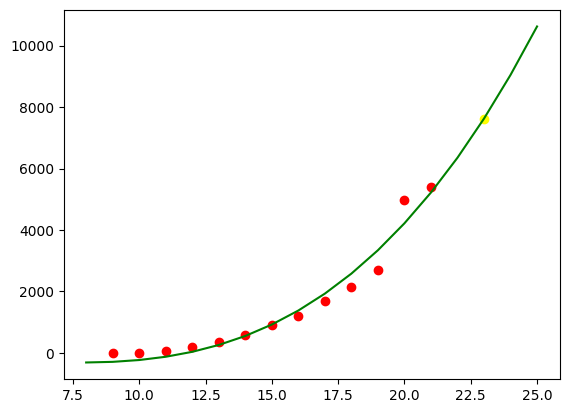

In [22]:
# 预测过程
x = np.linspace(8,25,25 - 8 + 1)
y = m1*x**3 + m2*x**2 + m3*x + b
# 绘制历史数据点状图
plt.scatter(data[:,0],data[:,1],c="red")
# 预测2023年销售额
year = 23
predict = m1*year**3 + m2*year**2 + m3*year + b
plt.scatter(year,predict,c="yellow")
print("2023年销售额:",predict)
# 绘制曲线
plt.plot(x,y,c="green")
plt.show()